Desafio - Prever as vendas que vamos ter em determinado periodo com base nos gastos em anúncios nas 3 grandes redes que a empresa Hashtag investe: TV, Jornal e Rádio

- Passo 1: Entendimento do Desafio
- Passo 2: Entendimento da Área/Empresa
- Passo 3: Extração/Obtenção dos dados
- Passo 4: Ajuste dos Dados(Tratamento/Limpeza)
- Passo 5: Análise Exploratória
- Passo 6: Modelagem + Algoritmos ( Aqui que entra a Inteligência Artificial)

In [4]:
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
#importar a base de dados
import pandas as pd
tabela = pd.read_csv('advertising.csv')
display(tabela)

,TV,Radio,Jornal,Vendas
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


              TV     Radio    Jornal    Vendas
TV      1.000000  0.054809  0.056648  0.901208
Radio   0.054809  1.000000  0.354104  0.349631
Jornal  0.056648  0.354104  1.000000  0.157960
Vendas  0.901208  0.349631  0.157960  1.000000


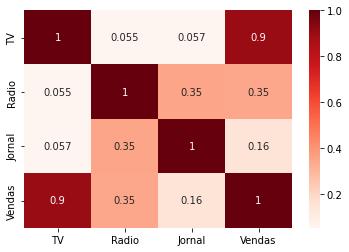

In [7]:
# Análise Exploratória
# visualizar como as informações de cada item estão distribuidas
# ver 
# correlação vai de 0 a 1 - significa o quão caminhando estão caminhando 2 coisas

import matplotlib.pyplot as plt
import seaborn as sns

print(tabela.corr())

#criar gráfico
sns.heatmap(tabela.corr(), cmap="Reds", annot= True)

# exibe o gráfico
plt.show()

# matplotlib
# seaborn


In [15]:
# Separando dados de treino e dados de teste

y = tabela["Vendas"]
x = tabela[["TV", "Radio", "Jornal"]]

from sklearn.model_selection import train_test_split

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size= 0.3, random_state=1)

Temos um problema de regressão
- Regressão Linear 
- RandomForest (Árvore de decisão)

In [13]:

# importa a inteligencia artificial
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

# criar a inteligencia artificial
modelo_regressaolinear = LinearRegression()
modelo_arvoredecisao = RandomForestRegressor()

# treinar a inteligencia artificial
modelo_regressaolinear.fit(x_treino, y_treino)
modelo_arvoredecisao.fit(x_treino, y_treino)

RandomForestRegressor()

Teste da Al e Avaliação do Melhor Modelo
- Vamos usar o R² -> diz o % que o nosso modelo consegue explicar o que acontece

In [16]:
previsao_regressaolinear = modelo_regressaolinear.predict(x_teste)
previsao_arvoredecisao = modelo_arvoredecisao.predict(x_teste)

from sklearn.metrics import r2_score

print(r2_score(y_teste, previsao_regressaolinear))
print(r2_score(y_teste, previsao_arvoredecisao))

0.9071151423684273
0.9652199608973496


Visualização Gráfica das Previsões

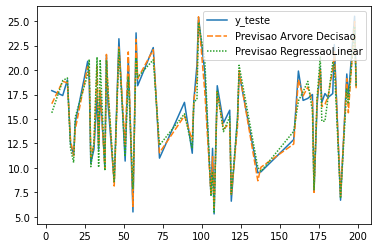

In [18]:
tabela_auxiliar = pd.DataFrame()
tabela_auxiliar['y_teste'] = y_teste
tabela_auxiliar['Previsao Arvore Decisao'] = previsao_arvoredecisao
tabela_auxiliar['Previsao RegressaoLinear'] = previsao_regressaolinear
sns.lineplot(data=tabela_auxiliar)

Como fazer uma nova previsão?

In [19]:
nova_tabela = pd.read_csv('novos.csv')
display(nova_tabela)

,TV,Radio,Jornal
0,23.1,3.8,69.2
1,44.5,0.0,5.1
2,170.2,45.9,0.0


In [21]:
previsao = modelo_arvoredecisao.predict(nova_tabela)
print(previsao)

[ 7.789  8.79  19.967]
